loading data..
reshaping images..
splitting data..
building model..
fitting model..
Epoch 1/50
184/184 [==============================] - 1033s 6s/step - loss: 1.0711 - acc: 0.4456 - val_loss: 1.0671 - val_acc: 0.4485
Epoch 2/50
184/184 [==============================] - 1027s 6s/step - loss: 1.0686 - acc: 0.4449 - val_loss: 1.0665 - val_acc: 0.4485
Epoch 3/50
184/184 [==============================] - 1013s 6s/step - loss: 1.0657 - acc: 0.4464 - val_loss: 1.0605 - val_acc: 0.4485
Epoch 4/50
184/184 [==============================] - 1004s 5s/step - loss: 1.0556 - acc: 0.4494 - val_loss: 1.0414 - val_acc: 0.4655
Epoch 5/50
184/184 [==============================] - 1005s 5s/step - loss: 1.0434 - acc: 0.4601 - val_loss: 1.0223 - val_acc: 0.4887
Epoch 6/50
184/184 [==============================] - 1003s 5s/step - loss: 1.0305 - acc: 0.4740 - val_loss: 1.0055 - val_acc: 0.4937
Epoch 7/50
184/184 [==============================] - 1001s 5s/step - loss: 1.0115 - acc: 0.4962 - val_loss: 0.9

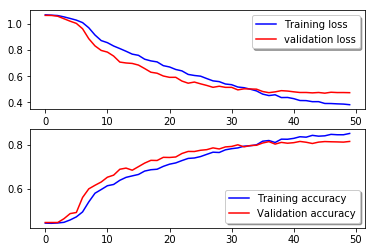

In [3]:
############################################## STEP1: IMPORTING PACKAGES ######################################################
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Activation, convolutional, pooling, Flatten, Dropout,MaxPool2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D,Conv2D
from keras.optimizers import Adamax, Adam, SGD,RMSprop
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
import itertools

np.random.seed(5)

################################################# STEP2: FUNCTIONS #############################################################
# Writes prediction to a csv file
def writeToFile(ar, file_name="FacialResult2"):
    #creating each row and writing predicted values to file
    with open(file_name+".csv", 'w') as csvfile:
        writer = csv.writer(csvfile,delimiter=',',quoting = csv.QUOTE_NONE)
        row = ['Id','Category']
        writer.writerow(row)
        for i in range(ar.shape[0]):
            row = [i,ar[i]]  
            writer.writerow(row)
            i+=1

#defining swish function which is f(x)=x.sigmoid(x)            
def swish(x):
    return (K.sigmoid(x) * x)

# building model
def buildModel():
    # defining the model using keras Sequential model function 
    model = Sequential()
    #setting activation function as swish function defined above
    get_custom_objects().update({'swish': Activation(swish )})
    #1st convolutional layer and max-pooling layer with input shape with size 48 x 48 with channel 1
    model.add(Conv2D(filters = 70, kernel_size = (5,5),padding = 'Same', activation ='swish', input_shape = (48,48,1)))
    model.add(Conv2D(filters = 70, kernel_size = (5,5),padding = 'Same', activation ='swish'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    #########################################################
    # Add  convolutional layer and max-pooling layer
    model.add(Conv2D(filters = 100, kernel_size = (3,3),padding = 'Same', activation ='swish'))
    model.add(Conv2D(filters = 100, kernel_size = (3,3),padding = 'Same', activation ='swish'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    ##########################################################
     # Add  convolutional layer and max-pooling layer
    model.add(convolutional.Conv2D(filters = 128,kernel_size = (3,3),padding='same',activation ='swish'))
    model.add(convolutional.Conv2D(filters = 128,kernel_size = (3,3),padding='same',activation ='swish'))
    model.add(pooling.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    ##########################################################
    # Add flatten layer to convert the output to 1D feature vector for input to dense layer
    model.add(Flatten())
    #using three dense layers with two dropout rate 0.5
    model.add(Dense(units=450))
    model.add(Activation('swish'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units = 450))
    model.add(Activation('swish'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units = 450))
    model.add(Activation('swish'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units = 3))
    #using softmax function to get probabilities for three classes
    model.add(Activation('softmax'))
    
    #using ADAM algorithm as optimizer 
    adam = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-03, decay=0.0)

    #using categorical_crossentropy to calculate loss and accuracy performance metric for the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

############################################### STEP3:LOADING DATA ###########################################################
#reading training data from the directory
print('loading data..')
train_data = np.loadtxt('train_data.csv',delimiter=',')
#reading train target (Y)
train_target =  np.loadtxt('train_target.csv',delimiter=',')
#reading test data to do predictions on it
test_data = np.loadtxt("test_data.csv", delimiter=',')

# rescaling data from range [0-255] scale to range [0-1] 
#because values in range [0-255] would be very high for model to process
train_data = train_data / 255.0
test_data = test_data / 255.0

print('reshaping images..')
# Reshape image in 3 dimensions with size 48 x 48 with channel 1
train_data =train_data.reshape( train_data.shape[0],48,48,1)
test_data = test_data.reshape( test_data.shape[0],48,48,1)
#Converting the target labels from scalar to vector with 3 components 
#as we have three categories 
train_target = to_categorical(train_target, 3)

print('splitting data..')
#Splitting data into train and testing set as 20% testing and 80% training data
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_target, test_size = 0.2, random_state=42)

########################################## STEP4: BUILDING, TRAINING MODEL ##################################################
print('building model..')
#building model..
model=buildModel()
# Setting a learning rate annealer using ReduceLROnPlateau function of Keras
# to reduce learning rate by factor 0.5 if there is no improvement in validation accuracy for 3 epochs
learningRateReduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
#declaring epoch and batch size
epochs = 50 
batch_size = 70

# Data augmentation technique using ImageDataGenerator to prevent overfitting 
# using rotation, zooming  prperties
auggen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,
        zca_whitening=False,rotation_range=10,zoom_range = 0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,  
        vertical_flip=False) 
auggen.fit(X_train)

print('fitting model..')
#training model using fit function
# Fit the model and using callbacks to set learning rate annealer technique
history = model.fit_generator(auggen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,callbacks=[learningRateReduction])

############################################## STEP5: EVALUATING MODEL ########################################################
print("Evaluating model..")
#evaluating model on validation dataset and training dataset
score = model.evaluate(X_val, Y_val)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_train, Y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

############################################### STEP6: PLOTTING GRAPHS ########################################################
# Plot the loss and accuracy curves for training and validation dataset
print('plotting graphs..')
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# ########################################### STEP7: PREDICTION ON TEST DATASET ###############################################
# predict results
print('predicting on test data..')
results = model.predict(test_data)
# select the index with the maximum probability
results = np.argmax(results,axis = 1)
#writing prediction into a csv file  
print('writing to a file..')
writeToFile(results)
print('written in file..')
